In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Chocolate Sales.csv")
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [24]:
# Converting amount to float data type and removing $ symbol
df['Amount'] = df['Amount'].replace('[\$,]', '', regex = True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\sneha\AppData\Local\Temp\ipykernel_4128\931483595.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['Amount'] = df['Amount'].replace('[\$,]', '', regex = True).astype(float)


In [36]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,13685.0,184


In [64]:
num_prod = df['Product'].nunique()
num_prod

22

In [66]:
unique_products = df['Product'].unique()
unique_products

array(['Mint Chip Choco', '85% Dark Bars', 'Peanut Butter Cubes',
       'Smooth Sliky Salty', '99% Dark & Pure', 'After Nines',
       '50% Dark Bites', 'Orange Choco', 'Eclairs', 'Drinking Coco',
       'Organic Choco Syrup', 'Milk Bars', 'Spicy Special Slims',
       'Fruit & Nut Bars', 'White Choc', 'Manuka Honey Choco',
       'Almond Choco', 'Raspberry Choco', 'Choco Coated Almonds',
       "Baker's Choco Chips", 'Caramel Stuffed Bars', '70% Dark Bites'],
      dtype=object)

In [16]:
## The data set is now cleaned and preprocessed, so we can continue with EDA

#### Q1) What is the total revenue generated and the total quantity of chocolate sold across the entire dataset?

In [60]:
total_revenue = df['Amount'].sum()
total_revenue

6183625.0

In [62]:
total_sold = df['Boxes Shipped'].sum()
total_sold

177007

#### Q2) What is the average price per unit of chocolate sold (Revenue / Quantity Sold)? Does this vary significantly across products or categories?

In [56]:
avg_price_per_unit = total_revenue/ total_sold
round(avg_ppu, 2)

34.93

In [72]:
avg_price_by_product = df.groupby('Product').apply(lambda x: x['Amount'].sum() / x['Boxes Shipped'].sum()).reset_index(name='Avg_Price_Per_Unit')
round(avg_price_by_product, 2)

C:\Users\sneha\AppData\Local\Temp\ipykernel_4128\1578358726.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_price_by_product = df.groupby('Product').apply(lambda x: x['Amount'].sum() / x['Boxes Shipped'].sum()).reset_index(name='Avg_Price_Per_Unit')


,Product,Avg_Price_Per_Unit
0,50% Dark Bites,34.90
1,70% Dark Bites,26.40
2,85% Dark Bars,38.40
3,99% Dark & Pure,36.89
4,After Nines,31.65
5,Almond Choco,41.20
6,Baker's Choco Chips,35.67
7,Caramel Stuffed Bars,26.57
8,Choco Coated Almonds,37.36
9,Drinking Coco,29.64


In [70]:
std_dev = avg_price_by_product['Avg_Price_Per_Unit'].std()
print("Standard deviation in unit prices across products:", round(std_dev, 2))

Standard deviation in unit prices across products: 4.01


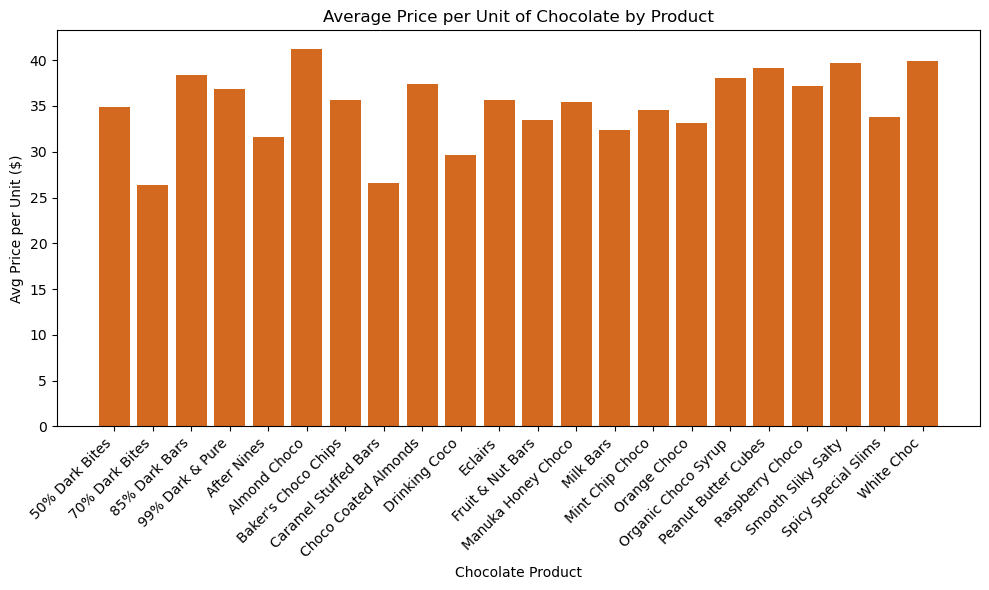

In [86]:
plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_product['Product'], avg_price_by_product['Avg_Price_Per_Unit'], color='chocolate')
plt.xlabel('Chocolate Product')
plt.ylabel('Avg Price per Unit ($)')
plt.title('Average Price per Unit of Chocolate by Product')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\sneha\AppData\Local\Temp\ipykernel_4128\87191746.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_by_product, x='Product', y='Avg_Price_Per_Unit', palette='flare')


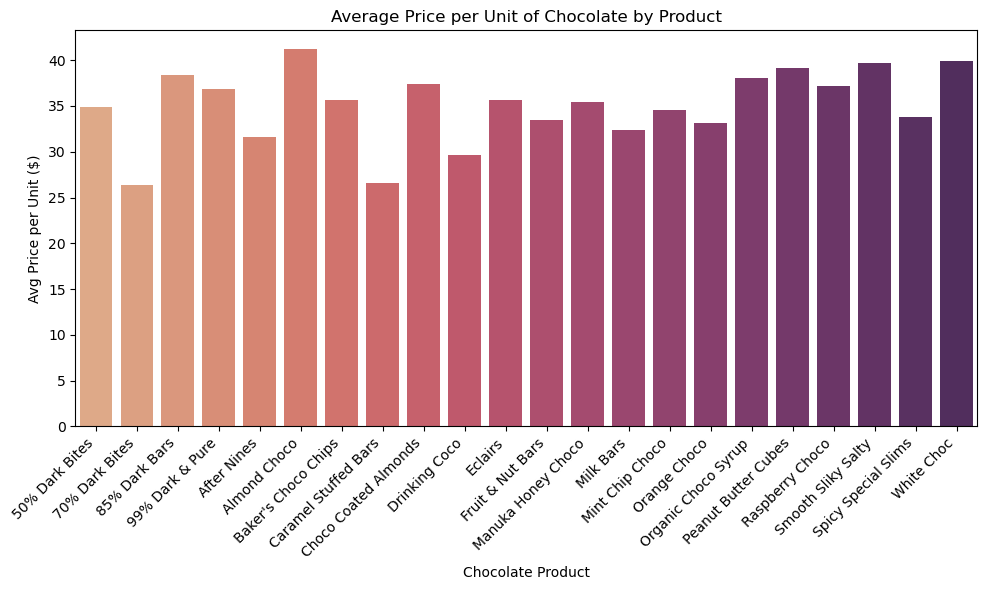

In [90]:
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_product, x='Product', y='Avg_Price_Per_Unit', palette='flare')
plt.xlabel('Chocolate Product')
plt.ylabel('Avg Price per Unit ($)')
plt.title('Average Price per Unit of Chocolate by Product')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Q3) Plot monthly or quarterly revenue and quantity sold. Are there any seasonal patterns (e.g., higher sales during certain months)?

In [93]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\sneha\AppData\Local\Temp\ipykernel_4128\2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [97]:
df['Month'] = df['Date'].dt.to_period('M')
df['Quarter'] = df['Date'].dt.to_period('Q')

In [103]:
monthly_summary = df.groupby('Month').agg({
    'Amount': 'sum',
    'Boxes Shipped': 'sum'
}).reset_index()
monthly_summary

,Month,Amount,Boxes Shipped
0,2022-01,896105.0,27535
1,2022-02,699377.0,18015
2,2022-03,749483.0,19561
3,2022-04,674051.0,21003
4,2022-05,752892.0,21856
5,2022-06,865144.0,26260
6,2022-07,803425.0,22876
7,2022-08,743148.0,19901


In [107]:
quarterly_summary = df.groupby('Quarter').agg({
    'Amount': 'sum',
    'Boxes Shipped': 'sum'
}).reset_index()
quarterly_summary

,Quarter,Amount,Boxes Shipped
0,2022Q1,2344965.0,65111
1,2022Q2,2292087.0,69119
2,2022Q3,1546573.0,42777


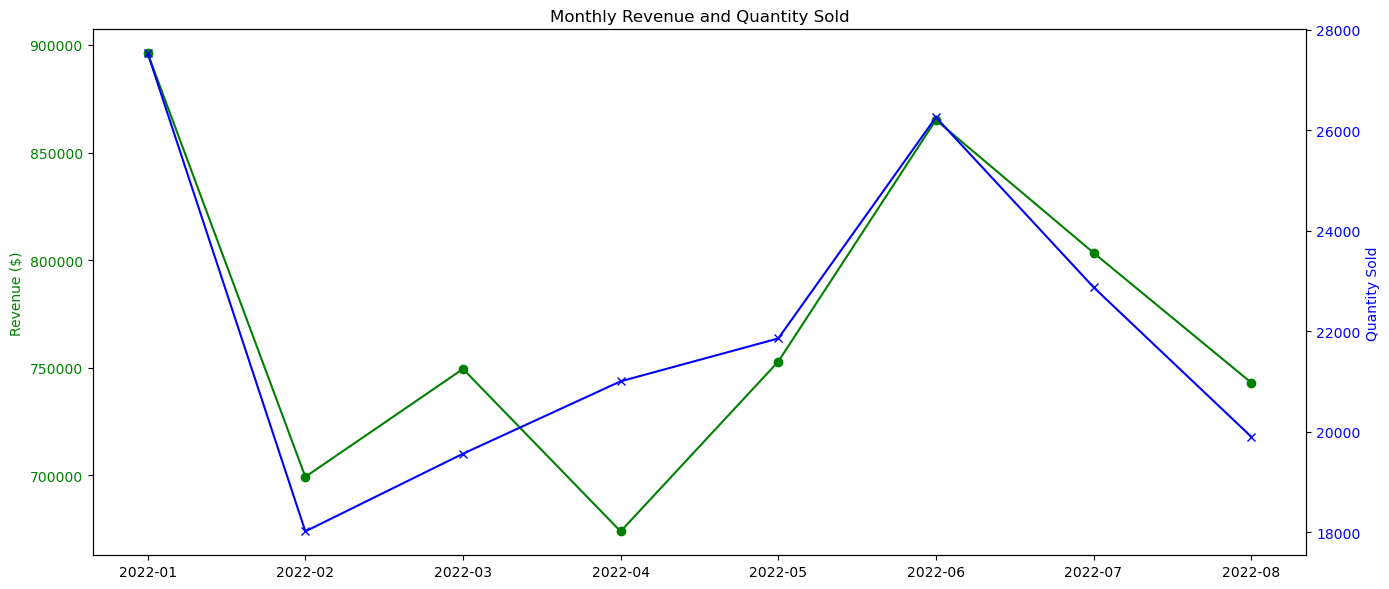

In [111]:
fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.plot(monthly_summary['Month'].astype(str), monthly_summary['Amount'], color='green', marker='o', label='Revenue')
ax1.set_ylabel('Revenue ($)', color='green')
ax1.tick_params(axis='y', labelcolor='green')

ax2 = ax1.twinx()
ax2.plot(monthly_summary['Month'].astype(str), monthly_summary['Boxes Shipped'], color='blue', marker='x', label='Quantity Sold')
ax2.set_ylabel('Quantity Sold', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Monthly Revenue and Quantity Sold')
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()

#### Q4) Are there specific days of the week or times of the month that consistently show higher sales? (You'll need to extract day of week/month from the 'Date' column).

In [114]:
df['DayOfWeek'] = df['Date'].dt.day_name()
df['DayOfMonth'] = df['Date'].dt.day

In [118]:
dow_summary = df.groupby('DayOfWeek').agg({
    'Amount': 'sum',
    'Boxes Shipped': 'sum'
}).reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).reset_index()
dow_summary

,DayOfWeek,Amount,Boxes Shipped
0,Monday,1385783.0,40987.0
1,Tuesday,1286719.0,34068.0
2,Wednesday,1204560.0,36720.0
3,Thursday,1244789.0,32643.0
4,Friday,1061774.0,32589.0
5,Saturday,NaN,NaN
6,Sunday,NaN,NaN


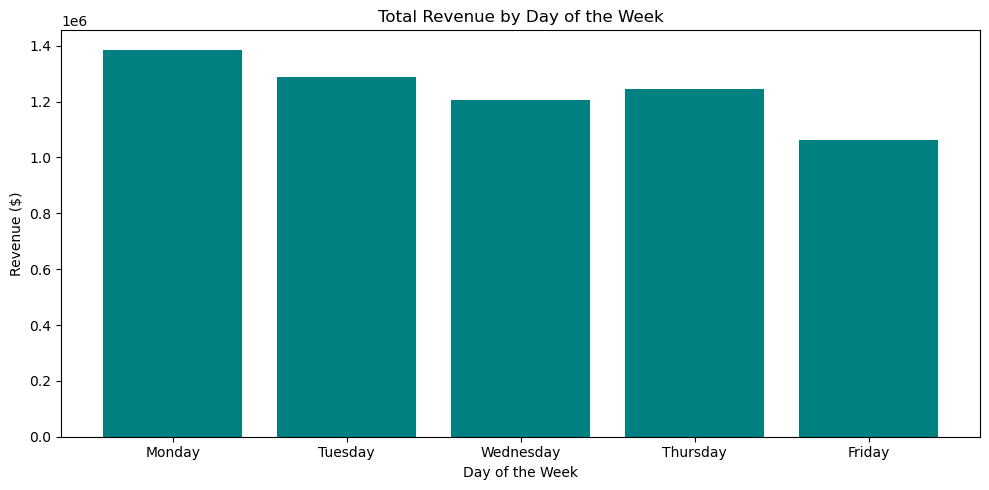

In [122]:
plt.figure(figsize=(10, 5))
plt.bar(dow_summary['DayOfWeek'], dow_summary['Amount'], color='teal')
plt.title('Total Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.show()

In [124]:
dom_summary = df.groupby('DayOfMonth').agg({
    'Amount': 'sum',
    'Boxes Shipped': 'sum'
}).reset_index()
dom_summary

,DayOfMonth,Amount,Boxes Shipped
0,1,168728.0,3633
1,2,146097.0,5130
2,3,192059.0,4866
3,4,312487.0,9661
4,5,216132.0,5237
5,6,113470.0,2640
6,7,271747.0,6517
7,8,173250.0,4699
8,9,144291.0,3926
9,10,185479.0,5635


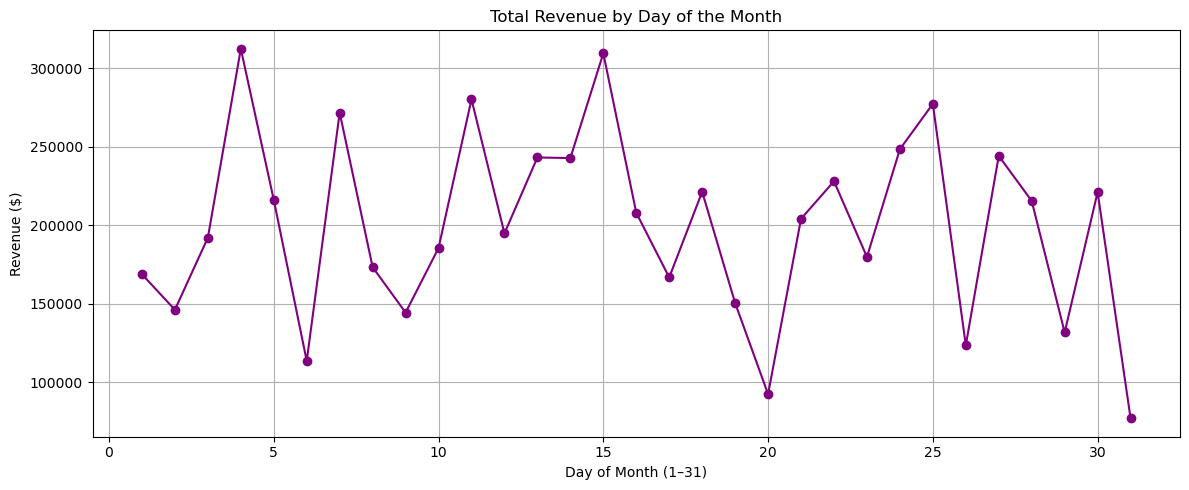

In [126]:
plt.figure(figsize=(12, 5))
plt.plot(dom_summary['DayOfMonth'], dom_summary['Amount'], marker='o', color='purple')
plt.title('Total Revenue by Day of the Month')
plt.xlabel('Day of Month (1–31)')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Q5) What is the average daily revenue and quantity sold?

In [131]:
daily_summary = df.groupby(df['Date'].dt.date).agg({
    'Amount': 'sum',
    'Boxes Shipped': 'sum'
}).reset_index()

In [133]:
avg_daily_revenue = daily_summary['Amount'].mean()
avg_daily_quantity = daily_summary['Boxes Shipped'].mean()

print("Average Daily Revenue: $", round(avg_daily_revenue, 2))
print("Average Daily Quantity Sold:", round(avg_daily_quantity, 2))

Average Daily Revenue: $ 36807.29
Average Daily Quantity Sold: 1053.61


#### Q6) Identify the top 5 and bottom 5 Product Names by: Total Revenue Total Quantity Sold

In [136]:
product_summary = df.groupby('Product').agg({
    'Amount': 'sum',
    'Boxes Shipped': 'sum'
}).reset_index()

In [138]:
top5_revenue = product_summary.sort_values('Amount', ascending=False).head(5)
print("Top 5 Products by Revenue:")
print(top5_revenue)

Top 5 Products by Revenue:
                Product    Amount  Boxes Shipped
19   Smooth Sliky Salty  349692.0           8810
0        50% Dark Bites  341712.0           9792
21           White Choc  329147.0           8240
17  Peanut Butter Cubes  324842.0           8304
10              Eclairs  312445.0           8757


In [140]:
bottom5_revenue = product_summary.sort_values('Amount', ascending=True).head(5)
print("Bottom 5 Products by Revenue:")
print(bottom5_revenue)

Bottom 5 Products by Revenue:
                 Product    Amount  Boxes Shipped
1         70% Dark Bites  211610.0           8015
7   Caramel Stuffed Bars  231588.0           8717
8   Choco Coated Almonds  241486.0           6464
6    Baker's Choco Chips  249613.0           6998
15          Orange Choco  256144.0           7732


In [142]:
top5_quantity = product_summary.sort_values('Boxes Shipped', ascending=False).head(5)
print("Top 5 Products by Quantity Sold:")
print(top5_quantity)

Top 5 Products by Quantity Sold:
                 Product    Amount  Boxes Shipped
0         50% Dark Bites  341712.0           9792
19    Smooth Sliky Salty  349692.0           8810
10               Eclairs  312445.0           8757
7   Caramel Stuffed Bars  231588.0           8717
20   Spicy Special Slims  293454.0           8685


In [144]:
bottom5_quantity = product_summary.sort_values('Boxes Shipped', ascending=True).head(5)
print("Bottom 5 Products by Quantity Sold:")
print(bottom5_quantity)

Bottom 5 Products by Quantity Sold:
                 Product    Amount  Boxes Shipped
8   Choco Coated Almonds  241486.0           6464
5           Almond Choco  277536.0           6736
6    Baker's Choco Chips  249613.0           6998
18       Raspberry Choco  264740.0           7115
15          Orange Choco  256144.0           7732


#### Q6) Which Category (Dark, Milk, White) generates the most revenue and sells the most quantity? Are there any surprising findings here?

In [155]:
category_summary = df.groupby('Product').agg({
    'Amount': 'sum',
    'Boxes Shipped': 'sum'
}).reset_index()

In [163]:
category_summary_by_revenue = category_summary.sort_values('Amount', ascending=False)
category_summary_by_revenue

,Product,Amount,Boxes Shipped
19,Smooth Sliky Salty,349692.0,8810
0,50% Dark Bites,341712.0,9792
21,White Choc,329147.0,8240
17,Peanut Butter Cubes,324842.0,8304
10,Eclairs,312445.0,8757
3,99% Dark & Pure,299796.0,8127
2,85% Dark Bars,299229.0,7793
16,Organic Choco Syrup,294700.0,7749
20,Spicy Special Slims,293454.0,8685
14,Mint Chip Choco,283969.0,8207


In [165]:
category_summary_by_quantity = category_summary.sort_values('Boxes Shipped', ascending=False)
category_summary_by_quantity

,Product,Amount,Boxes Shipped
0,50% Dark Bites,341712.0,9792
19,Smooth Sliky Salty,349692.0,8810
10,Eclairs,312445.0,8757
7,Caramel Stuffed Bars,231588.0,8717
20,Spicy Special Slims,293454.0,8685
9,Drinking Coco,256655.0,8660
13,Milk Bars,269248.0,8330
17,Peanut Butter Cubes,324842.0,8304
4,After Nines,261331.0,8257
21,White Choc,329147.0,8240


#### Q6) Which Location (or Country if available) generates the highest and lowest Revenue and Quantity Sold?

In [172]:
location_summary = df.groupby('Country').agg({
    'Amount': 'sum',
    'Boxes Shipped': 'sum'
}).reset_index()

In [192]:
top_location_revenue = location_summary.sort_values('Amount', ascending=False).head(1)
top_location_quantity = location_summary.sort_values('Boxes Shipped', ascending=False).head(1)

print("Highest Revenue Location:")
print(top_location_revenue)

print("\nHighest Quantity Sold Location:")
print(top_location_quantity)

Highest Revenue Location:
     Country     Amount  Boxes Shipped
0  Australia  1137367.0          32647

Highest Quantity Sold Location:
     Country     Amount  Boxes Shipped
0  Australia  1137367.0          32647


In [196]:
bottom_location_revenue = location_summary.sort_values('Amount', ascending=True).head(1)
bottom_location_quantity = location_summary.sort_values('Boxes Shipped', ascending=True).head(1)

print("Lowest Revenue Location:")
print(bottom_location_revenue)

print("\nLowest Quantity Sold Location:")
print(bottom_location_quantity)

Lowest Revenue Location:
       Country    Amount  Boxes Shipped
3  New Zealand  950418.0          26580

Lowest Quantity Sold Location:
       Country    Amount  Boxes Shipped
3  New Zealand  950418.0          26580


#### Q7) Who are the top 5 Sales Persons by total Revenue and Quantity Sold?

In [199]:
salesperson_summary = df.groupby('Sales Person').agg({
    'Amount': 'sum',
    'Boxes Shipped': 'sum'
}).reset_index()

In [201]:
top5_revenue = salesperson_summary.sort_values('Amount', ascending=False).head(5)
print("Top 5 Sales Persons by Revenue:")
print(top5_revenue)

Top 5 Sales Persons by Revenue:
       Sales Person    Amount  Boxes Shipped
5      Ches Bonnell  320901.0           7522
20       Oby Sorrel  316645.0           8608
17  Madelene Upcott  316099.0           7279
3       Brien Boise  312816.0           8102
16    Kelci Walkden  311710.0           8702


In [203]:
top5_quantity = salesperson_summary.sort_values('Boxes Shipped', ascending=False).head(5)
print("Top 5 Sales Persons by Quantity Sold:")
print(top5_quantity)

Top 5 Sales Persons by Quantity Sold:
           Sales Person    Amount  Boxes Shipped
15     Karlen McCaffrey  223895.0           9658
2        Beverie Moffet  278922.0           9214
7   Dennison Crosswaite  291669.0           8767
16        Kelci Walkden  311710.0           8702
20           Oby Sorrel  316645.0           8608
